In [34]:
import numpy as np
import pandas as pd
import re # to find the patterns

# Module dor visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# SINCE DATA LABELS WE HAVE IS NOT DISCRETE AND UNIQUE, HENCE WE USE REGRESSION
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [35]:
from google.colab import files
 
 
uploaded = files.upload()

Saving Medical Cost.csv to Medical Cost (1).csv


In [36]:
import pandas as pd
import io
 
data = pd.read_csv(io.BytesIO(uploaded['Medical Cost.csv']))
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [37]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [39]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Categorical data

In [40]:
data.sex.unique()

array(['female', 'male'], dtype=object)

In [41]:
data.smoker.unique()

array(['yes', 'no'], dtype=object)

In [42]:
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

### Label Encoding

In [43]:
from sklearn.preprocessing import LabelEncoder
# we use the following code for the three parameters
le = LabelEncoder()
le.fit(data.sex.drop_duplicates())
data.sex  = le.transform(data.sex)

In [44]:
le.fit(data.smoker.drop_duplicates())
data.smoker  = le.transform(data.smoker)

In [45]:
le.fit(data.region.drop_duplicates())
data.region  = le.transform(data.region)

In [58]:
data.head()
# Females are assigned as 0 label and males ae assigned as 1 label
# also yes and no as assigned as yes = 1 and no = 0

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### ***Data Correlation***

In [59]:
# using heat map we find the correlation later on

# finding the correlation of charges with other parameter
data.corr()['charges'].sort_values()   
# this shows a high correlation with smoker, age, and bmi

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<Axes: >

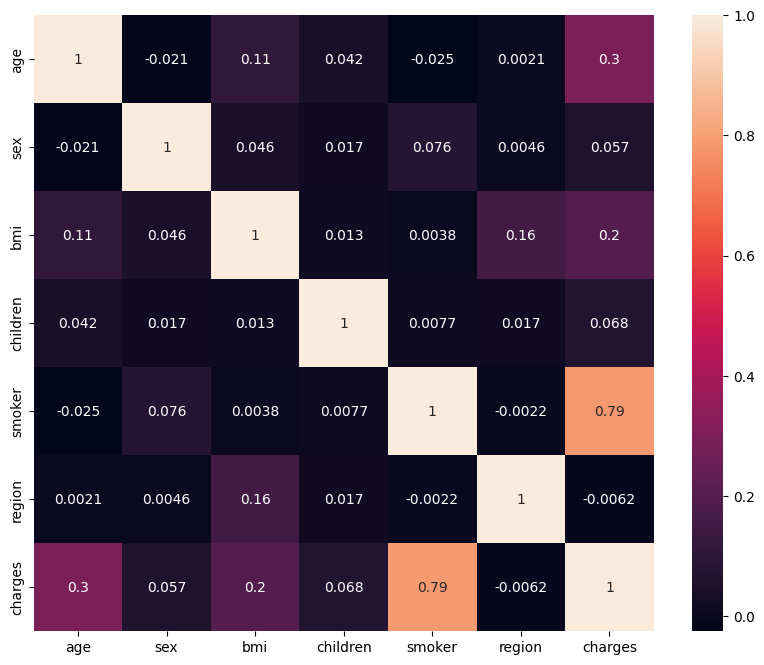

In [60]:
# we start with figure and axes
f, ax = plt.subplots(figsize = (10, 8))
corr = data.corr()
# heatmap is present in seaborn 
sns.heatmap(corr, ax=ax, annot=True)

## **Smoker Analysis**

In [61]:
pip install -U seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


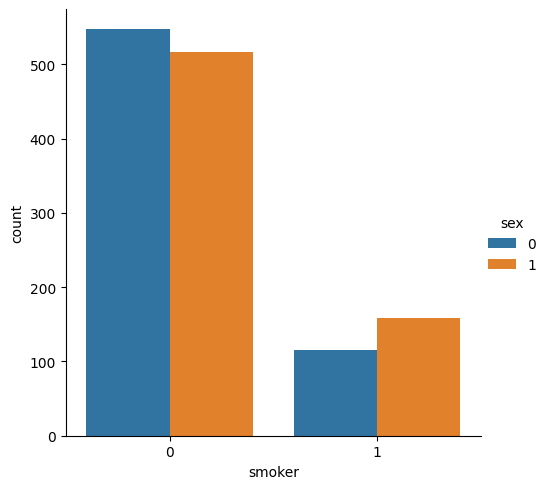

In [62]:
import seaborn as sns
sns.catplot(x="smoker", kind="count", hue='sex', data=data)
# instead of factor plot we use catlpot
# hue parameter determines which column in the data frame should be used for colour encoding

In [64]:
# smokers are smaller in number.
# males are in higher number in smoking respect to women
# So cost of treatment in men is higher than women given the impact of smoking
# But for non smokers, women have higher cost when it comes to treatment compared to men

### BMI Analysis

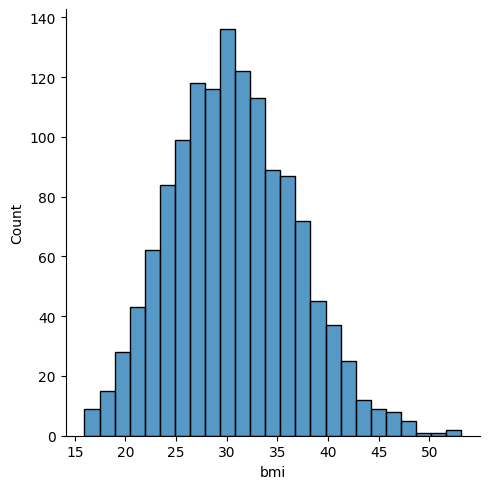

In [73]:
ax = sns.displot(data["bmi"], kde=False)
# Kernel Density Estimation (KDE) is a way to estimate the probability density function of a continuous random variable.


### Children count Analysis

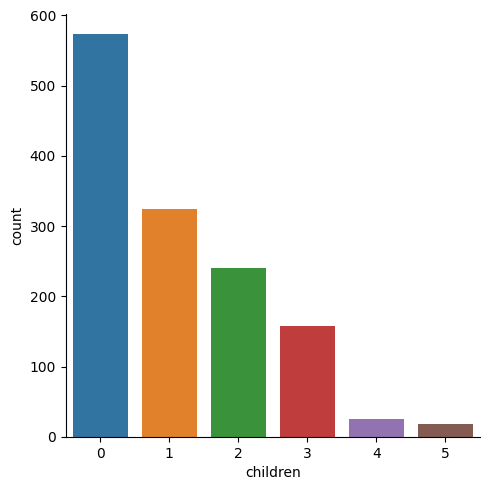

In [77]:
sns.catplot(x="children", kind = "count", data = data, height = 5) 

### Splitting Data

In [78]:
# Regions and chargees are not necessay column so we drop them
x = data.drop(data.columns[[6,5]], axis = 1)
y = data["charges"]

In [81]:
x.head()

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0


In [82]:
y.head()  

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [83]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state = 0)

## Feature scaling:


*   This is done as data is having different distribution and hence need to scale up




In [85]:
from sklearn.preprocessing import  MinMaxScaler
sc_x = MinMaxScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.fit_transform(xtest)

In [86]:
xtrain[0:2]

array([[0.        , 0.        , 0.32970137, 0.        , 0.        ],
       [0.45652174, 0.        , 0.45305354, 0.        , 0.        ]])

# **ML Models**

In [87]:
from sklearn.ensemble import RandomForestRegressor
linear = LinearRegression()
dt = DecisionTreeRegressor()
svr = svm.SVR() # support vector machine
rf = RandomForestRegressor()


Training

In [88]:
linear.fit(xtrain, ytrain)

LinearRegression()

In [90]:
dt.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [91]:
svr.fit(xtrain, ytrain)

SVR()

In [92]:
rf.fit(xtrain, ytrain)

RandomForestRegressor()

Prediction

In [93]:
y_pred_linear = linear.predict(xtest)
y_pred_dt = dt.predict(xtest)
y_pred_svr = svr.predict(xtest)
y_pred_rf = rf.predict(xtest)

### Root Mean Square Error (RMSE)

In [97]:
import math
error_linear = math.sqrt(mean_squared_error((y_pred_linear), ytest))
error_dt = math.sqrt(mean_squared_error((y_pred_dt), ytest))
error_svr = math.sqrt(mean_squared_error((y_pred_svr), ytest))
error_rf = math.sqrt(mean_squared_error((y_pred_rf), ytest))

In [99]:
# PRINTING ERRORS
print("      Model          : RSM Error   \n      ")
print(" Linear Regression   : ", error_linear)
print(" Decision Tree       : ", error_dt  )
print(" Support Vector      : ", error_svr  )
print(" Random Forest       : " , error_rf )

      Model          : RSM Error   
      
 Linear Regression   :  5827.61034882603
 Decision Tree       :  6941.293214248045
 Support Vector      :  13132.937356154958
 Random Forest       :  5265.217484574209


In [ ]:
# RandomForest gives the best result still error is too high as we have limited data and hence training and testing gives higher error
